In [1]:
from vehicle import Vehicle
from scipy.optimize import fsolve as josie_solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

0.09430573766236

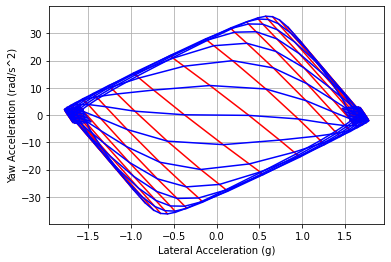

In [2]:
df = pd.read_csv("MMM_inc_angle_test.csv")

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'r')
    #plt.text(list(df2["y_double_dot"])[-1]/9.81, list(df2["yaw_acceleration"])[-1], f'sample {x}')

for x in df["steered_angle"].unique():
    df2 = df[(df["steered_angle"] == x)]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'b')
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

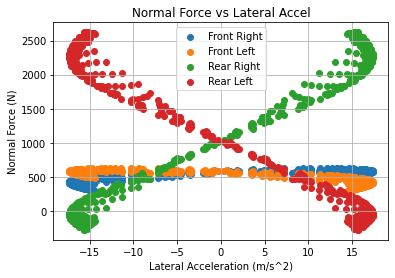

In [3]:
import math
plt.scatter(df["y_double_dot"], df["front_left_tire_centric_forces_2"], label = "Front Right")
plt.scatter(df["y_double_dot"], df["front_right_tire_centric_forces_2"], label = "Front Left")
plt.scatter(df["y_double_dot"], df["rear_left_tire_centric_forces_2"], label = "Rear Right")
plt.scatter(df["y_double_dot"], df["rear_right_tire_centric_forces_2"], label = "Rear Left")
plt.title("Normal Force vs Lateral Accel")
plt.grid()
plt.ylabel("Normal Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

In [4]:
data_point = df.iloc[100]
for index, point in df.iterrows():
    if abs(point["yaw_acceleration"]) < 5 and abs(point["y_double_dot"]) > abs(data_point["y_double_dot"]):
       data_point = point
print(data_point)

Unnamed: 0                           98.000000
front_left_unsprung_displacement      0.004446
front_left_chassis_height             0.032893
front_left_tire_centric_forces_0      0.000000
front_left_tire_centric_forces_1   -734.732869
                                       ...    
x_double_dot                         -4.866331
y_double_dot                        -17.409958
yaw_acceleration                      2.054260
roll                                  0.044245
pitch                                 0.005169
Name: 98, Length: 79, dtype: float64


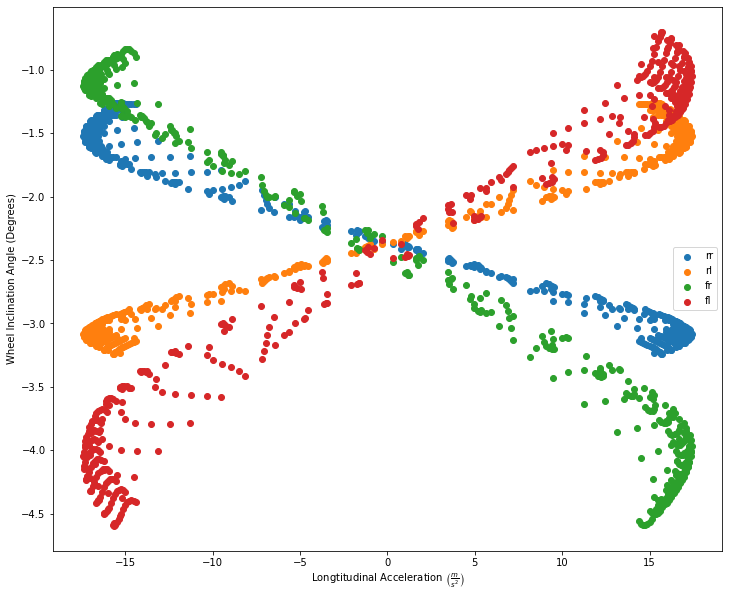

In [5]:
fig = plt.figure(figsize=(12,10))
plt.scatter(df['y_double_dot'], df['rear_right_inclination_angle'] * (180 / np.pi), label='rr')
plt.scatter(df['y_double_dot'], df['rear_left_inclination_angle'] * (180 / np.pi), label='rl')
plt.scatter(df['y_double_dot'], df['front_right_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['y_double_dot'], df['front_left_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel(r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

In [6]:
df.columns

Index(['Unnamed: 0', 'front_left_unsprung_displacement',
       'front_left_chassis_height', 'front_left_tire_centric_forces_0',
       'front_left_tire_centric_forces_1', 'front_left_tire_centric_forces_2',
       'front_left_velocity_0', 'front_left_velocity_1',
       'front_left_velocity_2', 'front_left_slip_angle',
       'front_left_inclination_angle', 'front_left_vehicle_centric_forces_0',
       'front_left_vehicle_centric_forces_1',
       'front_left_vehicle_centric_forces_2', 'front_left_moments_0',
       'front_left_moments_1', 'front_left_moments_2',
       'front_left_steering_inc', 'front_right_unsprung_displacement',
       'front_right_chassis_height', 'front_right_tire_centric_forces_0',
       'front_right_tire_centric_forces_1',
       'front_right_tire_centric_forces_2', 'front_right_velocity_0',
       'front_right_velocity_1', 'front_right_velocity_2',
       'front_right_slip_angle', 'front_right_inclination_angle',
       'front_right_vehicle_centric_forces_0'

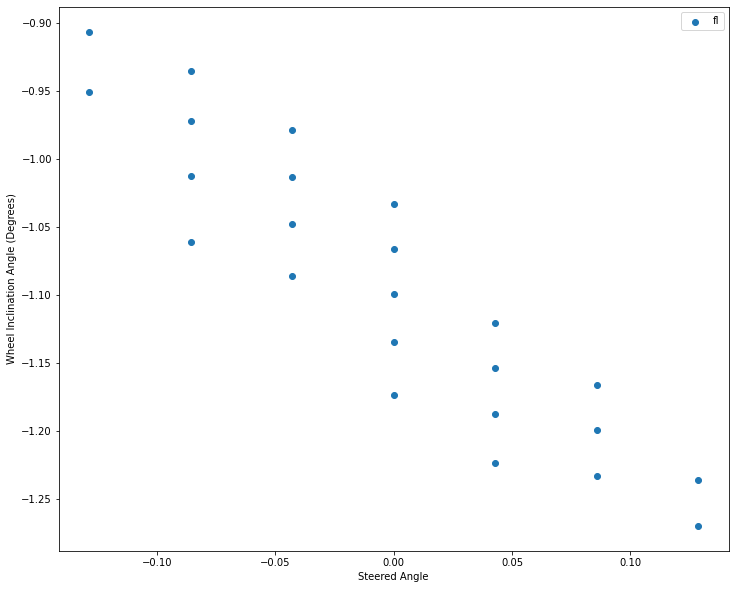

In [7]:
fig = plt.figure(figsize=(12,10))
#plt.scatter(df['steered_angle'], df['rear_right_inclination_angle'] * (180 / np.pi), label='rr')
#plt.scatter(df['steered_angle'], df['rear_left_inclination_angle'] * (180 / np.pi), label='rl')
#plt.scatter(df['steered_angle'], df['front_right_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df[(df['y_double_dot'] < 19) & (df['y_double_dot'] > 17)]['steered_angle'], df[(df['y_double_dot'] < 19) & (df['y_double_dot'] > 17)]['front_left_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel('Steered Angle')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

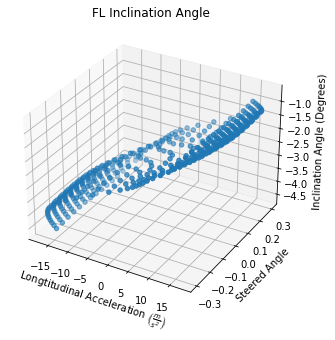

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure()
ax3 = Axes3D(fig3, auto_add_to_figure=False)
fig3.add_axes(ax3)

ax3.scatter(df['y_double_dot'], df['steered_angle'], df['front_left_inclination_angle'] * (180 / np.pi))
ax3.set(title='FL Inclination Angle', xlabel=r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$', ylabel='Steered Angle', zlabel='Inclination Angle (Degrees)')

plt.show()

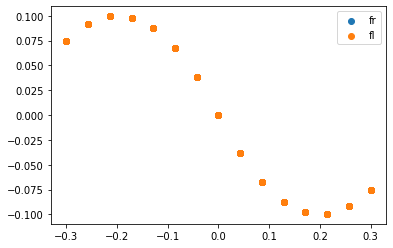

In [9]:
fig4 = plt.figure()
plt.scatter(df['steered_angle'], df['front_right_steering_inc'] * (180 / np.pi), label='fr')
#plt.scatter(df['steered_angle'], df['front_left_steering_inc'] * (180 / np.pi), label='fl')
plt.legend()
plt.show()